In [92]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [93]:
movie_meta = pd.read_csv('./data/movie.metadata.v1.csv')

movie_meta.head()

,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Languages,Countries,Genres Reduced
0,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,['English Language'],['United States of America'],"['Thriller', 'Action', 'Adventure', 'Horror', ..."
1,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,['English Language'],['United States of America'],"['Thriller', 'Crime', 'Drama', 'Biography']"
2,/m/0crgdbh,Brun bitter,1988,NaN,83.0,['Norwegian Language'],['Norway'],"['Crime', 'Fiction', 'Drama']"
3,/m/0285_cd,White Of The Eye,1987,NaN,110.0,['English Language'],['United Kingdom'],"['Thriller', 'Psychological', 'Adult']"
4,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,['German Language'],['Germany'],['Drama']


In [94]:
import ast

# Function to safely convert string representations of lists into actual lists
def string_to_list(list_string):
    try:
        # This safely evaluates a string as a list
        return ast.literal_eval(list_string)
    except ValueError:
        # In case of error (e.g., empty strings), return an empty list
        return []

movie_meta['Languages'] = movie_meta['Languages'].apply(string_to_list)
movie_meta['Countries'] = movie_meta['Countries'].apply(string_to_list)
movie_meta['Genres Reduced'] = movie_meta['Genres Reduced'].apply(string_to_list)


In [95]:
# movie_meta['Genres Reduced'].apply(len)
movie_meta.head()

,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Languages,Countries,Genres Reduced
0,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,[English Language],[United States of America],"[Thriller, Action, Adventure, Horror, Western,..."
1,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,[English Language],[United States of America],"[Thriller, Crime, Drama, Biography]"
2,/m/0crgdbh,Brun bitter,1988,NaN,83.0,[Norwegian Language],[Norway],"[Crime, Fiction, Drama]"
3,/m/0285_cd,White Of The Eye,1987,NaN,110.0,[English Language],[United Kingdom],"[Thriller, Psychological, Adult]"
4,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,[German Language],[Germany],[Drama]


In [96]:
# Drop the movies with no genres associated
movie_meta_v2 = movie_meta[movie_meta['Genres Reduced'].map(len) > 0]


In [97]:
movie_meta_v2.head()

,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Languages,Countries,Genres Reduced
0,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,[English Language],[United States of America],"[Thriller, Action, Adventure, Horror, Western,..."
1,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,[English Language],[United States of America],"[Thriller, Crime, Drama, Biography]"
2,/m/0crgdbh,Brun bitter,1988,NaN,83.0,[Norwegian Language],[Norway],"[Crime, Fiction, Drama]"
3,/m/0285_cd,White Of The Eye,1987,NaN,110.0,[English Language],[United Kingdom],"[Thriller, Psychological, Adult]"
4,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,[German Language],[Germany],[Drama]


In [98]:
character_metadata_columns = [
    "Wikipedia movie ID",
    "Freebase movie ID",
    "Movie release date",
    "Character name",
    "Actor date of birth",
    "Actor gender",
    "Actor height (in meters)",
    "Actor ethnicity (Freebase ID)",
    "Actor name",
    "Actor age at movie release",
    "Freebase character/actor map ID",
    "Freebase character ID",
    "Freebase actor ID"
]

character_metadata = pd.read_csv('./data/character.metadata.tsv', sep='\t', names=character_metadata_columns)

character_metadata.head()

,Wikipedia movie ID,Freebase movie ID,Movie release date,Character name,Actor date of birth,Actor gender,Actor height (in meters),Actor ethnicity (Freebase ID),Actor name,Actor age at movie release,Freebase character/actor map ID,Freebase character ID,Freebase actor ID
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg


In [99]:
# Extract the relevant columns from the movie dataset for the merge
movie_genres = movie_meta_v2[['Freebase movie ID', 'Genres Reduced']]

# Merge the genres with the character dataset on Freebase movie ID
character_data_genres = character_metadata.merge(movie_genres, on='Freebase movie ID', how='left')

# Display the first few rows of the merged dataframe
character_data_genres.head()


,Wikipedia movie ID,Freebase movie ID,Movie release date,Character name,Actor date of birth,Actor gender,Actor height (in meters),Actor ethnicity (Freebase ID),Actor name,Actor age at movie release,Freebase character/actor map ID,Freebase character ID,Freebase actor ID,Genres Reduced
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7,"[Thriller, Action, Adventure, Horror, Western,..."
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4,"[Thriller, Action, Adventure, Horror, Western,..."
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l,"[Thriller, Action, Adventure, Horror, Western,..."
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc,"[Thriller, Action, Adventure, Horror, Western,..."
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg,"[Thriller, Action, Adventure, Horror, Western,..."


In [100]:
# Step 1: Explode the 'Genres Reduced' column to create a row for each genre associated with each actor
character_data_genres_exploded = character_data_genres.explode('Genres Reduced')

# Step 2: Count the number of male and female actors for each genre
genre_gender_counts = character_data_genres_exploded.groupby(['Genres Reduced', 'Actor gender']).size().unstack(fill_value=0)

# Step 3: Calculate the percentages of male and female actors for each genre
genre_gender_counts['Total'] = genre_gender_counts.sum(axis=1)
genre_gender_counts['Male (%)'] = (genre_gender_counts['M'] / genre_gender_counts['Total']) * 100
genre_gender_counts['Female (%)'] = (genre_gender_counts['F'] / genre_gender_counts['Total']) * 100

# Resulting table
genre_gender_counts = genre_gender_counts[['M', 'F', 'Male (%)', 'Female (%)']]

genre_gender_counts.reset_index(inplace=True)  # Resetting index to make 'Genres Reduced' a column again
genre_gender_counts.rename(columns={'M': 'Male Count', 'F': 'Female Count'}, inplace=True)

# Add a row with the total numbers and ratios for all genres
total_counts = genre_gender_counts[['Male Count', 'Female Count']].sum()
total_counts['Genres Reduced'] = 'Total'
total_counts['Male (%)'] = (total_counts['Male Count'] / (total_counts['Male Count'] + total_counts['Female Count'])) * 100
total_counts['Female (%)'] = (total_counts['Female Count'] / (total_counts['Male Count'] + total_counts['Female Count'])) * 100

genre_gender_counts = genre_gender_counts.append(total_counts, ignore_index=True)



C:\Users\arist\AppData\Local\Temp\ipykernel_728\4161317589.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  genre_gender_counts = genre_gender_counts.append(total_counts, ignore_index=True)


In [101]:
genre_gender_counts.head()

Actor gender,Genres Reduced,Male Count,Female Count,Male (%),Female (%)
0,Action,57756,19002,75.244274,24.755726
1,Adult,4435,3308,57.277541,42.722459
2,Adventure,54583,18953,74.226229,25.773771
3,Animated,2553,1580,61.771111,38.228889
4,Animation,11512,5311,68.430125,31.569875


In [102]:
# Export the table to a CSV file
genre_gender_counts.to_csv('./data/genderbygenre.csv', index=False)

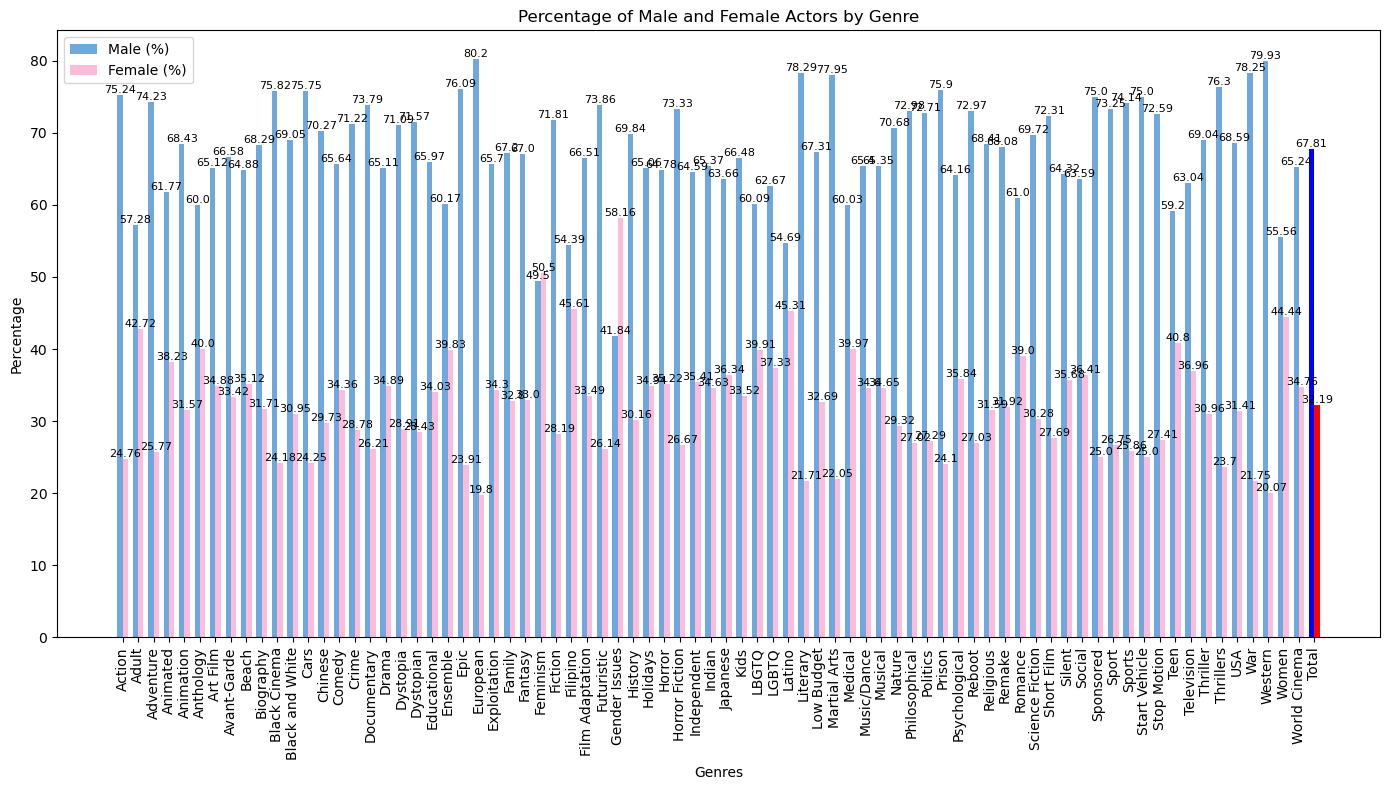

In [121]:
# Define colors for male and female, with a distinct color for the 'Total' category
colors_male = ['#6fa8dc' if genre != 'Total' else 'b' for genre in genre_gender_counts['Genres Reduced']]
colors_female = ['#ffbcda' if genre != 'Total' else 'r' for genre in genre_gender_counts['Genres Reduced']]

# Set up the figure and axis for the bar chart
plt.figure(figsize=(14, 8))

# Create a bar chart
# The index provides the x locations for the groups
bar_width = 0.35
index = np.arange(len(genre_gender_counts['Genres Reduced']))

# Plotting both 'Male (%)' and 'Female (%)' as bar charts
bar1 = plt.bar(index, genre_gender_counts['Male (%)'], bar_width, label='Male (%)', color=colors_male)
bar2 = plt.bar(index + bar_width, genre_gender_counts['Female (%)'], bar_width, label='Female (%)', color=colors_female)

# Add some text for labels, title, and axes ticks
plt.xlabel('Genres')
plt.ylabel('Percentage')
plt.title('Percentage of Male and Female Actors by Genre')
plt.xticks(index + bar_width / 2, genre_gender_counts['Genres Reduced'], rotation=90)
plt.legend()

# Adding the percentage values on top of the bars
for bar in bar1 + bar2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval, 2), va='bottom', ha='center', fontsize=8)

# Show the plot
plt.tight_layout()
plt.show()


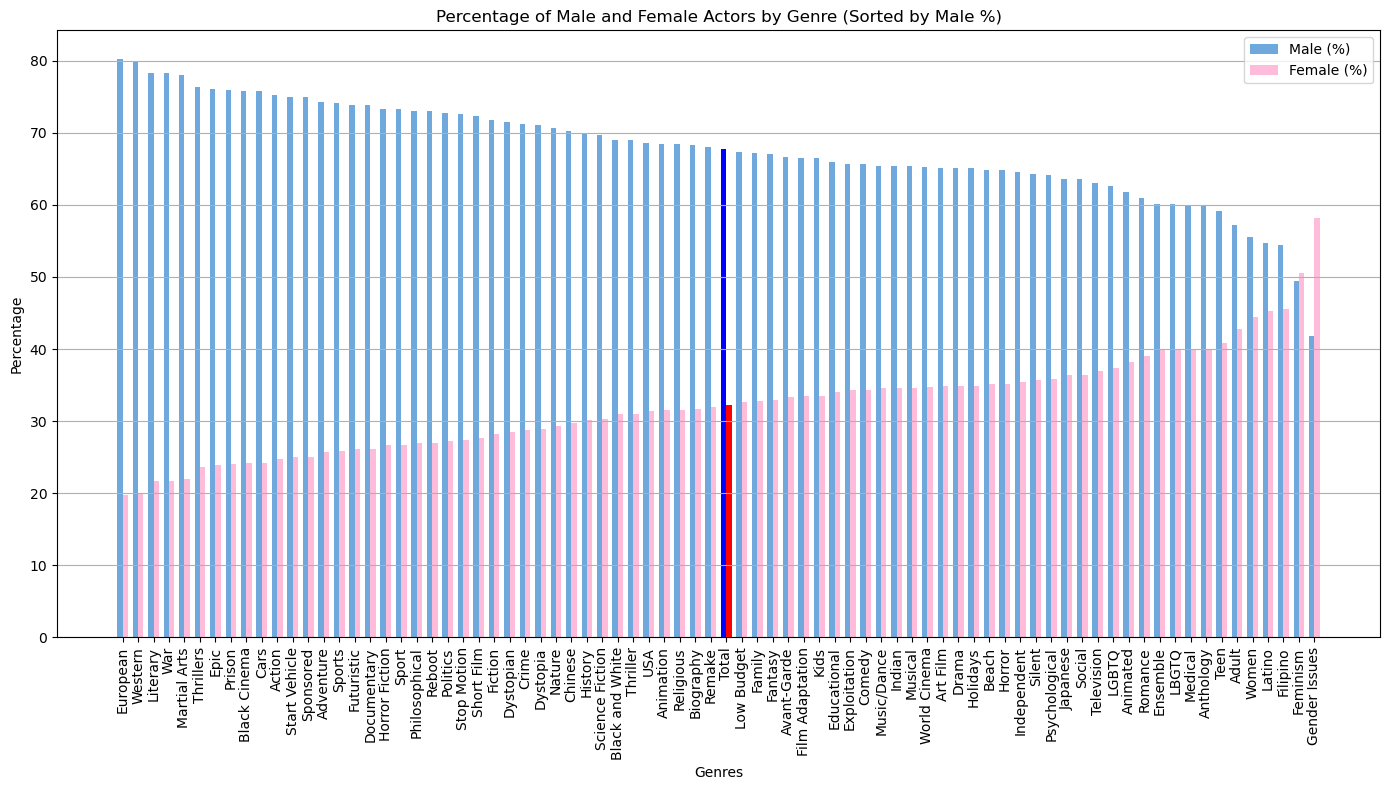

In [120]:
# Sort the dataframe by 'Male (%)' in descending order to visualize from most to least percentage of males
sorted_gender_by_genre_df = genre_gender_counts.sort_values('Male (%)', ascending=False)

# Define colors for male and female, with a distinct color for the 'Total' category
colors_male = ['#6fa8dc' if genre != 'Total' else 'b' for genre in sorted_gender_by_genre_df['Genres Reduced']]
colors_female = ['#ffbcda' if genre != 'Total' else 'r' for genre in sorted_gender_by_genre_df['Genres Reduced']]


# Set up the figure and axis for the bar chart again with the sorted data
plt.figure(figsize=(14, 8))

# Recreate the index for the sorted dataframe
index = np.arange(len(sorted_gender_by_genre_df['Genres Reduced']))

# Plotting both 'Male (%)' and 'Female (%)' for the sorted dataframe
bar1 = plt.bar(index, sorted_gender_by_genre_df['Male (%)'], bar_width, label='Male (%)', color=colors_male)
bar2 = plt.bar(index + bar_width, sorted_gender_by_genre_df['Female (%)'], bar_width, label='Female (%)', color=colors_female)

# Add some text for labels, title, and axes ticks
plt.xlabel('Genres')
plt.ylabel('Percentage')
plt.title('Percentage of Male and Female Actors by Genre (Sorted by Male %)')
plt.xticks(index + bar_width / 2, sorted_gender_by_genre_df['Genres Reduced'], rotation=90)
plt.legend()
plt.grid(axis='y')

# # Adding the percentage values on top of the bars
# for bar in bar1 + bar2:
#     yval = bar.get_height()
#     plt.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval, 2), va='bottom', ha='center', fontsize=8)

# Show the plot
plt.tight_layout()
plt.show()


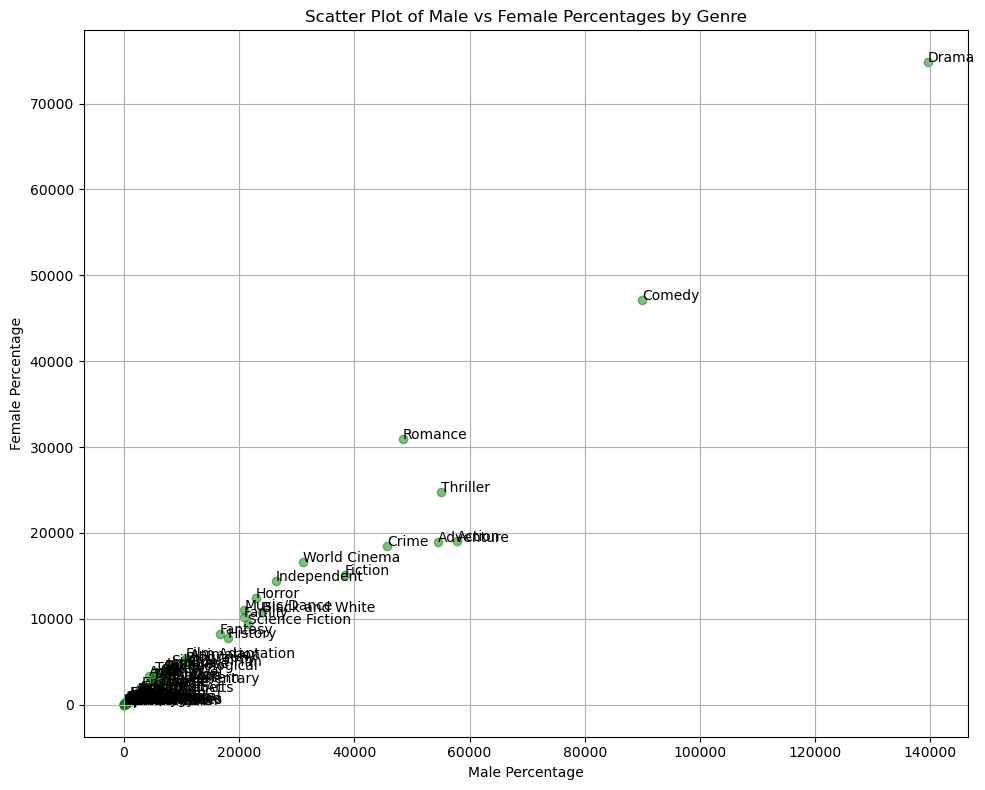

In [109]:
# Set up the figure for the scatter plot
plt.figure(figsize=(10, 8))

# Scatter plot of male percentage (x-axis) vs female percentage (y-axis)
plt.scatter(genre_gender_counts[genre_gender_counts['Genres Reduced'] != 'Total']['Male Count'], genre_gender_counts[genre_gender_counts['Genres Reduced'] != 'Total']['Female Count'], color='green', alpha=0.5)

# Adding genre labels for each point
for i, txt in enumerate(genre_gender_counts['Genres Reduced']):
    plt.annotate(txt, (genre_gender_counts['Male Count'][i], genre_gender_counts['Female Count'][i]))

# Add some text for labels, title, and axes ticks
plt.xlabel('Male Percentage')
plt.ylabel('Female Percentage')
plt.title('Scatter Plot of Male vs Female Percentages by Genre')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()
